In [1]:
import psycopg2

In [2]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
conn = psycopg2.connect("dbname=db_user_development user=pgdev-admin")

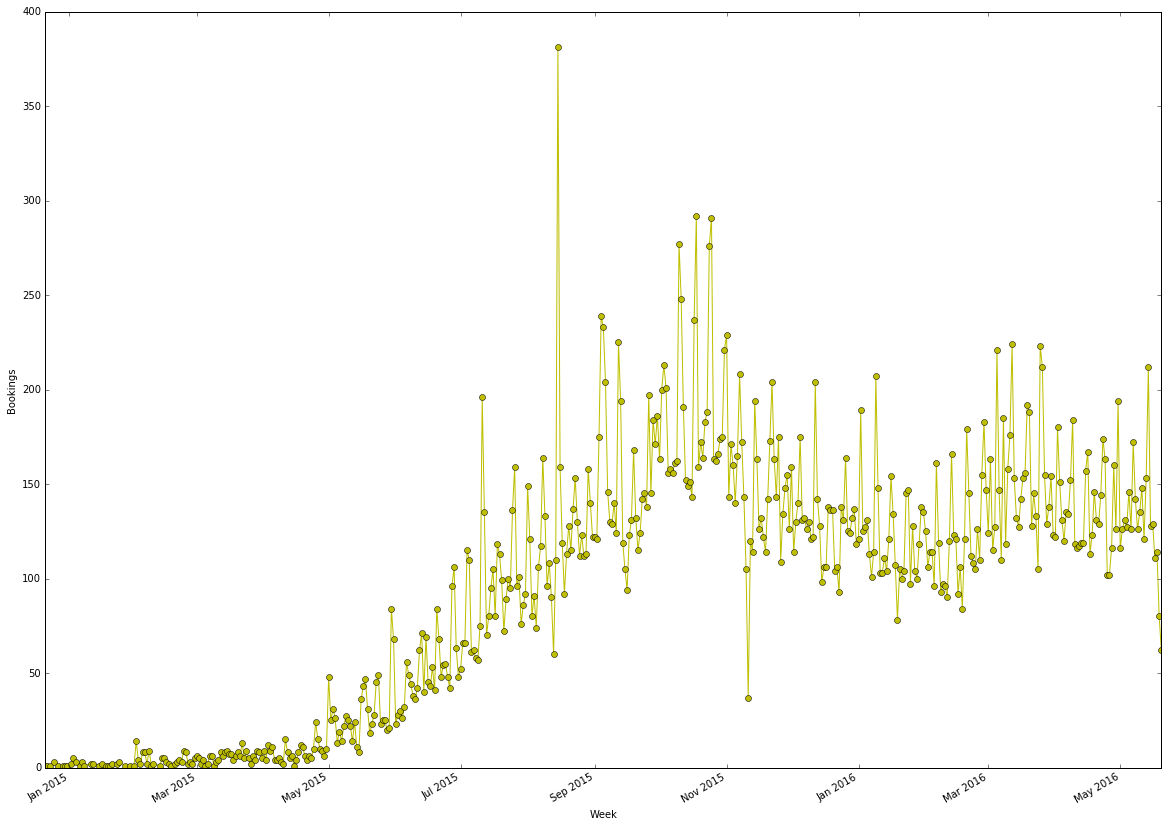

In [21]:
cur = conn.cursor()
cur.execute("""SELECT COUNT(*), date_trunc('day', created_at) FROM task_requests
            WHERE state = 'completed' AND enable = true 
            GROUP BY 2
            ORDER BY 2""")

data = cur.fetchall()
app_bookings, app_weeks = zip(*data)

cur.close();

fig = plt.figure(figsize=(20,15))

plt.plot(app_weeks, app_bookings, 'yo-')

plt.ylabel('Bookings')

plt.xlabel('Week')

fig.autofmt_xdate()

plt.show()

In [19]:
conn.close()